In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/cloudy-Tokyo24/source/cloudy.exe'

2024-08-03 18:47:05.750525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# A function is defined that print out Cloudy input file for coronal model
def make_coronal(T, name='Coronal2'):
    Min = pc.CloudyInput(f'../models/{name}_{np.log10(T):.1f}')
    Min.set_cste_density(0)
    Min.set_stop(('temperature off',
                  'Lyman optical depth = 10 linear'))
    Min.set_other((f'set temperature floor {T} K',
                   'Table HM12 redshift 0.67',
                   'Cosmic Rays Background'))
    Min.set_emis_tab(('H  1 1215.67A', 'C  4 1548.19A', 'O  6 1031.91A'))
    Min.print_input()

In [3]:
make_coronal(T=1e3)
make_coronal(T=1e4)
make_coronal(T=2e4)
make_coronal(T=3e4)
make_coronal(T=1e5)
make_coronal(T=3e5)

In [4]:
pc.run_cloudy('../models', model_name='Coronal2', n_proc=8)

make: [Coronal2_4.5.out] Error 2 (ignored)
make: [Coronal2_5.0.out] Error 2 (ignored)
make: [Coronal2_5.5.out] Error 2 (ignored)


In [5]:
Ms = pc.load_models('../models/Coronal2_', read_opd=True, cloudy_version_major=24)

In [6]:
for M in Ms:
    M.print_stats()
    print(M.depth[-1])

 Name of the model: ../models/Coronal2_3.0
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 Depth_in (cut) = 0.000e+00 (1.896e+14), depth_out (cut) = 1.951e+18 (1.950e+18)
 H+ mass = 3.88e+21, H mass = 2.06e+22 N zones: 51
 <H+/H> = 0.23, <He++/He> = 0.00, <He+/He> = 0.23
 <O+++/O> = 0.00, <O++/O> = 0.00, <O+/O> = 0.19
 <N+++/N> = 0.00, <N++/N> = 0.00, <N+/N> = 0.21
 T(O+++) = nan, T(O++) = 2912, T(O+) = 2858
 <ne> = 0,  <nH> = 1, T0 = 2716, t2=0.0172
 <log U> = -5.52
1.9495e+18
 Name of the model: ../models/Coronal2_4.301029995663981
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 Depth_in (cut) = 0.000e+00 (1.251e+15), depth_out (cut) = 3.367e+19 (3.025e+19)
 H+ mass = 3.39e+23, H mass = 3.56e+23 N zones: 19
 <H+/H> = 0.95, <He++/He> = 0.00, <He+/He> = 0.06
 <O+++/O> = 0.00, <O++/O> = 0.00, <O+/O> = 0.94
 <N+++/N> = 0.00, <N++/N> = 0.00, <N+/N> = 0.91
 T(O+++) = 20000, T(O++) = 20000, T(O+) = 20000
 <ne> = 1,  <nH> = 1, T0 = 20000, t

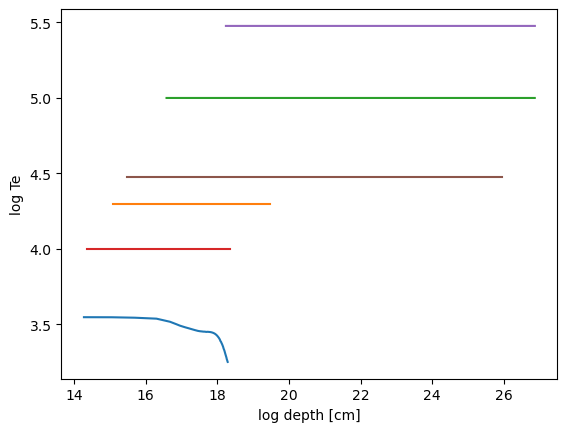

In [7]:
for M in Ms:
    plt.plot(np.log10(M.depth), np.log10(M.te),
             label='{:4.2}'.format(np.log10(M.te[0])))
plt.xlabel('log depth [cm]')
plt.ylabel('log Te');

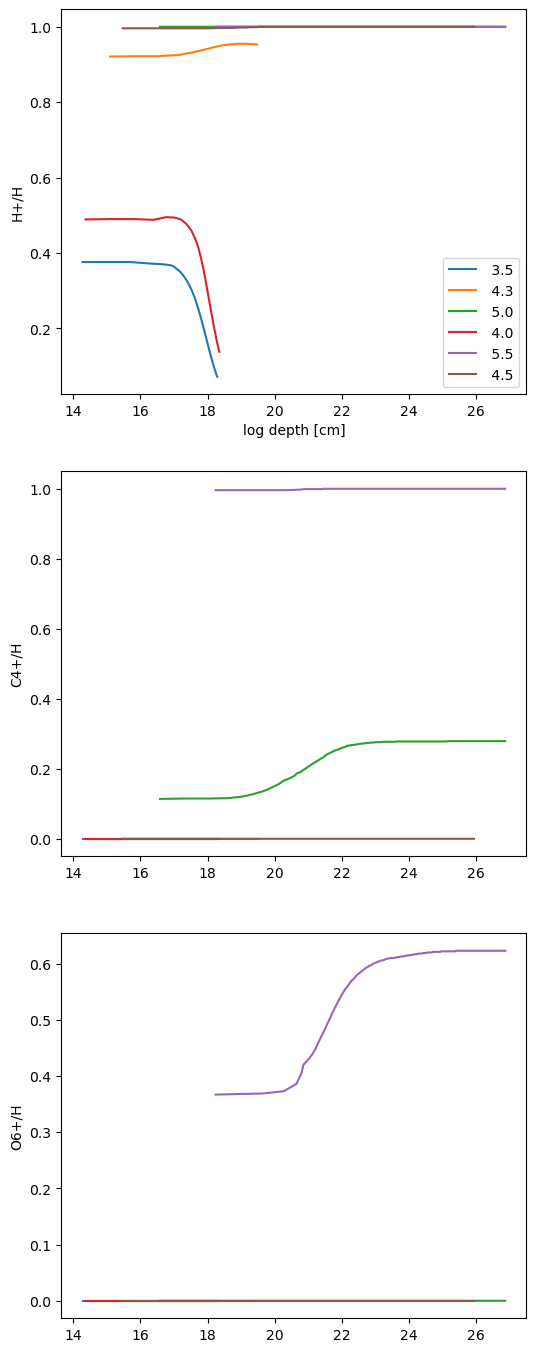

In [8]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(6,17))
for M in Ms:
    ax1.plot(np.log10(M.depth), M.get_ionic('H',1),
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax2.plot(np.log10(M.depth), M.get_ionic('C',4),
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax3.plot(np.log10(M.depth), M.get_ionic('O',6),
             label='{:4.2}'.format(np.log10(M.te[0])))
ax1.set_xlabel('log depth [cm]')
ax1.set_ylabel('H+/H')
ax2.set_ylabel('C4+/H')
ax3.set_ylabel('O6+/H')
ax1.legend();

In [9]:
for M in Ms:
    print('Te={}, Tau 912 = {}, Nzones = {}'.format(M.te[0],
                                                    M.out['###Last'].split('912:')[1].split('#')[0],
                                            M.n_zones))    

Te=3532.5, Tau 912 =  1.00e+01, Nzones = 51
Te=20000.0, Tau 912 =  1.01e+01, Nzones = 19
Te=100000.0, Tau 912 =  6.09e-01, Nzones = 1400
Te=10000.0, Tau 912 =  1.00e+01, Nzones = 42
Te=300000.0, Tau 912 =  1.38e+00, Nzones = 1400
Te=30000.0, Tau 912 =  1.00e+01, Nzones = 278


In [10]:
M.emis_labels

array(['H__1_121567A', 'C__4_154819A', 'O__6_103191A'], dtype='<U12')

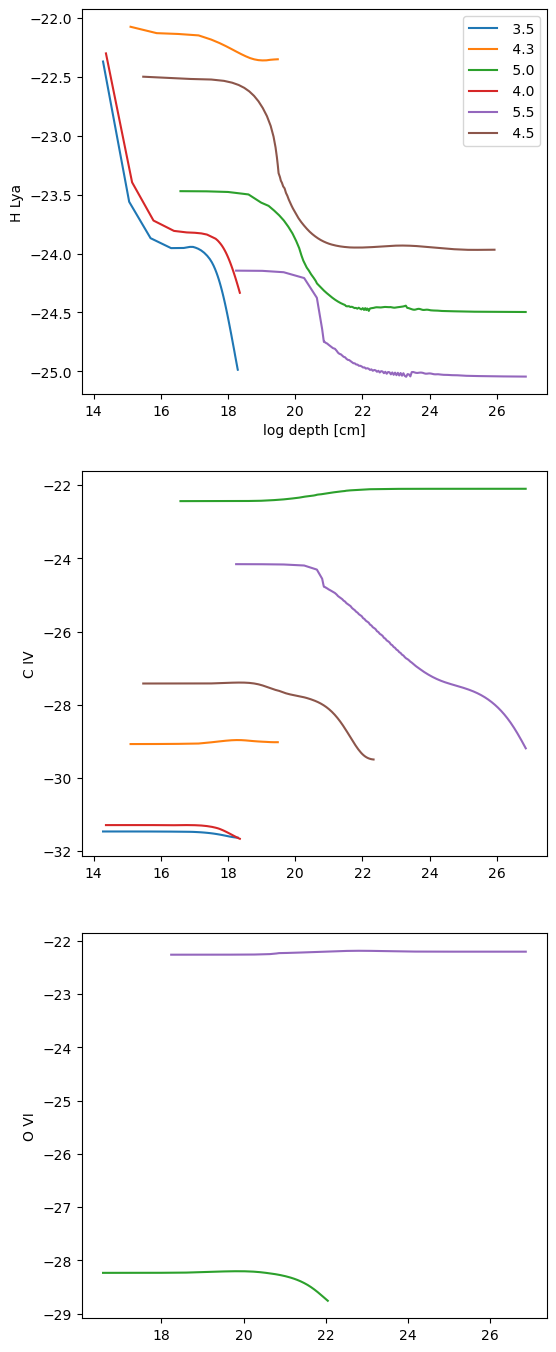

In [12]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(6,17))
for M in Ms:
    ax1.plot(np.log10(M.depth), np.log10(M.get_emis('H__1_121567A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax2.plot(np.log10(M.depth), np.log10(M.get_emis('C__4_154819A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax3.plot(np.log10(M.depth), np.log10(M.get_emis('O__6_103191A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
ax1.set_xlabel('log depth [cm]')
ax1.set_ylabel('H Lya')
ax2.set_ylabel('C IV')
ax3.set_ylabel('O VI')
ax1.legend();